In [11]:
import csv
import numpy as np
import pandas as pd

In [12]:
f_accidents = open('../Data/Preproceso/accidents.csv')
accidents_csv = csv.reader(f_accidents)
headers_accidents = accidents_csv.next()
accidents = []
for row in accidents_csv:
    accidents.append(row[2:])

headers_accidents

['',
 'Unnamed: 0',
 'DRUNK_DR',
 'FATALS',
 'LATITUDE',
 'LONGITUD',
 'STATE',
 'DATE']

In [13]:
f_storms = open('../Data/Transformacion/transformacion.csv')
storms_csv = csv.reader(f_storms)
headers_storms = storms_csv.next()
storms = []
for row in storms_csv:
    storms.append(row)
headers_storms

['EPISODE_ID',
 'BEGIN_DATE',
 'DURACION',
 'END_DATE',
 'GRANIZO',
 'LAT',
 'LLUVIA',
 'LON',
 'NIEVE',
 'RANGE',
 'T. ELECTRICA',
 'TORNADO',
 'VIENTO']

In [14]:
import math

def merc_x(lon):
  r_major=6378137.000
  return r_major*math.radians(lon)

def merc_y(lat):
  if lat>89.5:lat=89.5
  if lat<-89.5:lat=-89.5
  r_major=6378137.000
  r_minor=6356752.3142
  temp=r_minor/r_major
  eccent=math.sqrt(1-temp**2)
  phi=math.radians(lat)
  sinphi=math.sin(phi)
  con=eccent*sinphi
  com=eccent/2
  con=((1.0-con)/(1.0+con))**com
  ts=math.tan((math.pi/2-phi)/2)/con
  y=0-r_major*math.log(ts)
  return y

#Distancia entre dos punto geograficos. Se obtiene sus proyecciones Mercator y la distancia euclidea entre ellas en km
def dist(p1lon,p1lat,p2lon,p2lat):
	x1=merc_x(p1lon)
	x2=merc_x(p2lon)
	y1=merc_y(p1lat)
	y2=merc_y(p2lat)
	return math.sqrt((x1-x2)**2+(y1-y2)**2) / 1000

In [15]:
f_accidents = open('../Data/Preproceso/accidents.csv')
accidents_csv = csv.reader(f_accidents)
headers_accidents = accidents_csv.next()
accidents = []
for row in accidents_csv:
    accidents.append(row[2:])

In [16]:
f_storms = open('../Data/Transformacion/transformacion.csv')
storms_csv = csv.reader(f_storms)
headers_storms = storms_csv.next()
storms = []
for row in storms_csv:
    storms.append(row)

In [17]:
accidentes_provocados = [0] * len(storms)
#storm[7] -> lon, storm[5] -> lat, storm[9] -> radio, storm[1]-> begindate, storm[3] -> endate
for i, storm in enumerate(storms):
    for accident in accidents:
        if dist(float(storm[7]), float(storm[5]), float(accident[3]), float(accident[2])) <= float(storm[9]) and np.datetime64(storm[1]) <= np.datetime64(accident[5]) <= np.datetime64(storm[3]) and float(accident[0]) <= 0:
            accidentes_provocados[i] += 1

In [18]:
for i in range(len(storms)):
    storms[i].append(accidentes_provocados[i])

headers_storms.append('ACCIDENTES')
df = pd.DataFrame(storms, columns=headers_storms)
df.to_csv('../Data/Transformacion/transformacion2.csv', index='EPISODE_ID')

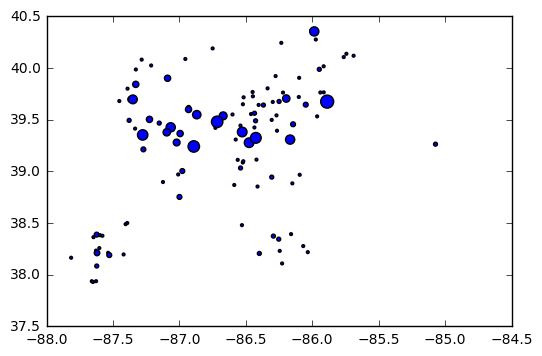

In [19]:
import matplotlib.pyplot as plt

df_accidents = df[df['ACCIDENTES'] > 0]

plt.scatter(df_accidents['LON'].astype(float), df_accidents['LAT'].astype(float), s = df_accidents['ACCIDENTES'].astype(float)*4)
plt.show()